In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training_data = pd.read_csv("training_data_modified.csv", index_col = 0)
test_data = pd.read_csv("test_data_modified.csv", index_col = 0)

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
need_to_standarize = ['PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV',
       'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
       'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG',
       'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC']
training_data[need_to_standarize] = scaler.fit_transform(training_data[need_to_standarize])
test_data[need_to_standarize] = scaler.fit_transform(test_data[need_to_standarize])

In [4]:
def corr_heatmap(dataset):
    plt.figure(figsize=(30,30))
    plt.rcParams["axes.labelsize"] = 20 #correlation matrix
    sns.set(font_scale=1.4)
    sns.heatmap(dataset.corr('pearson'), annot = True ,linewidths=.1)
    plt.show()

In [5]:
def find_correlation(data, threshold=0.8): #removing correlated rows > 0.95
    corr_mat = data.corr( 'pearson')
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

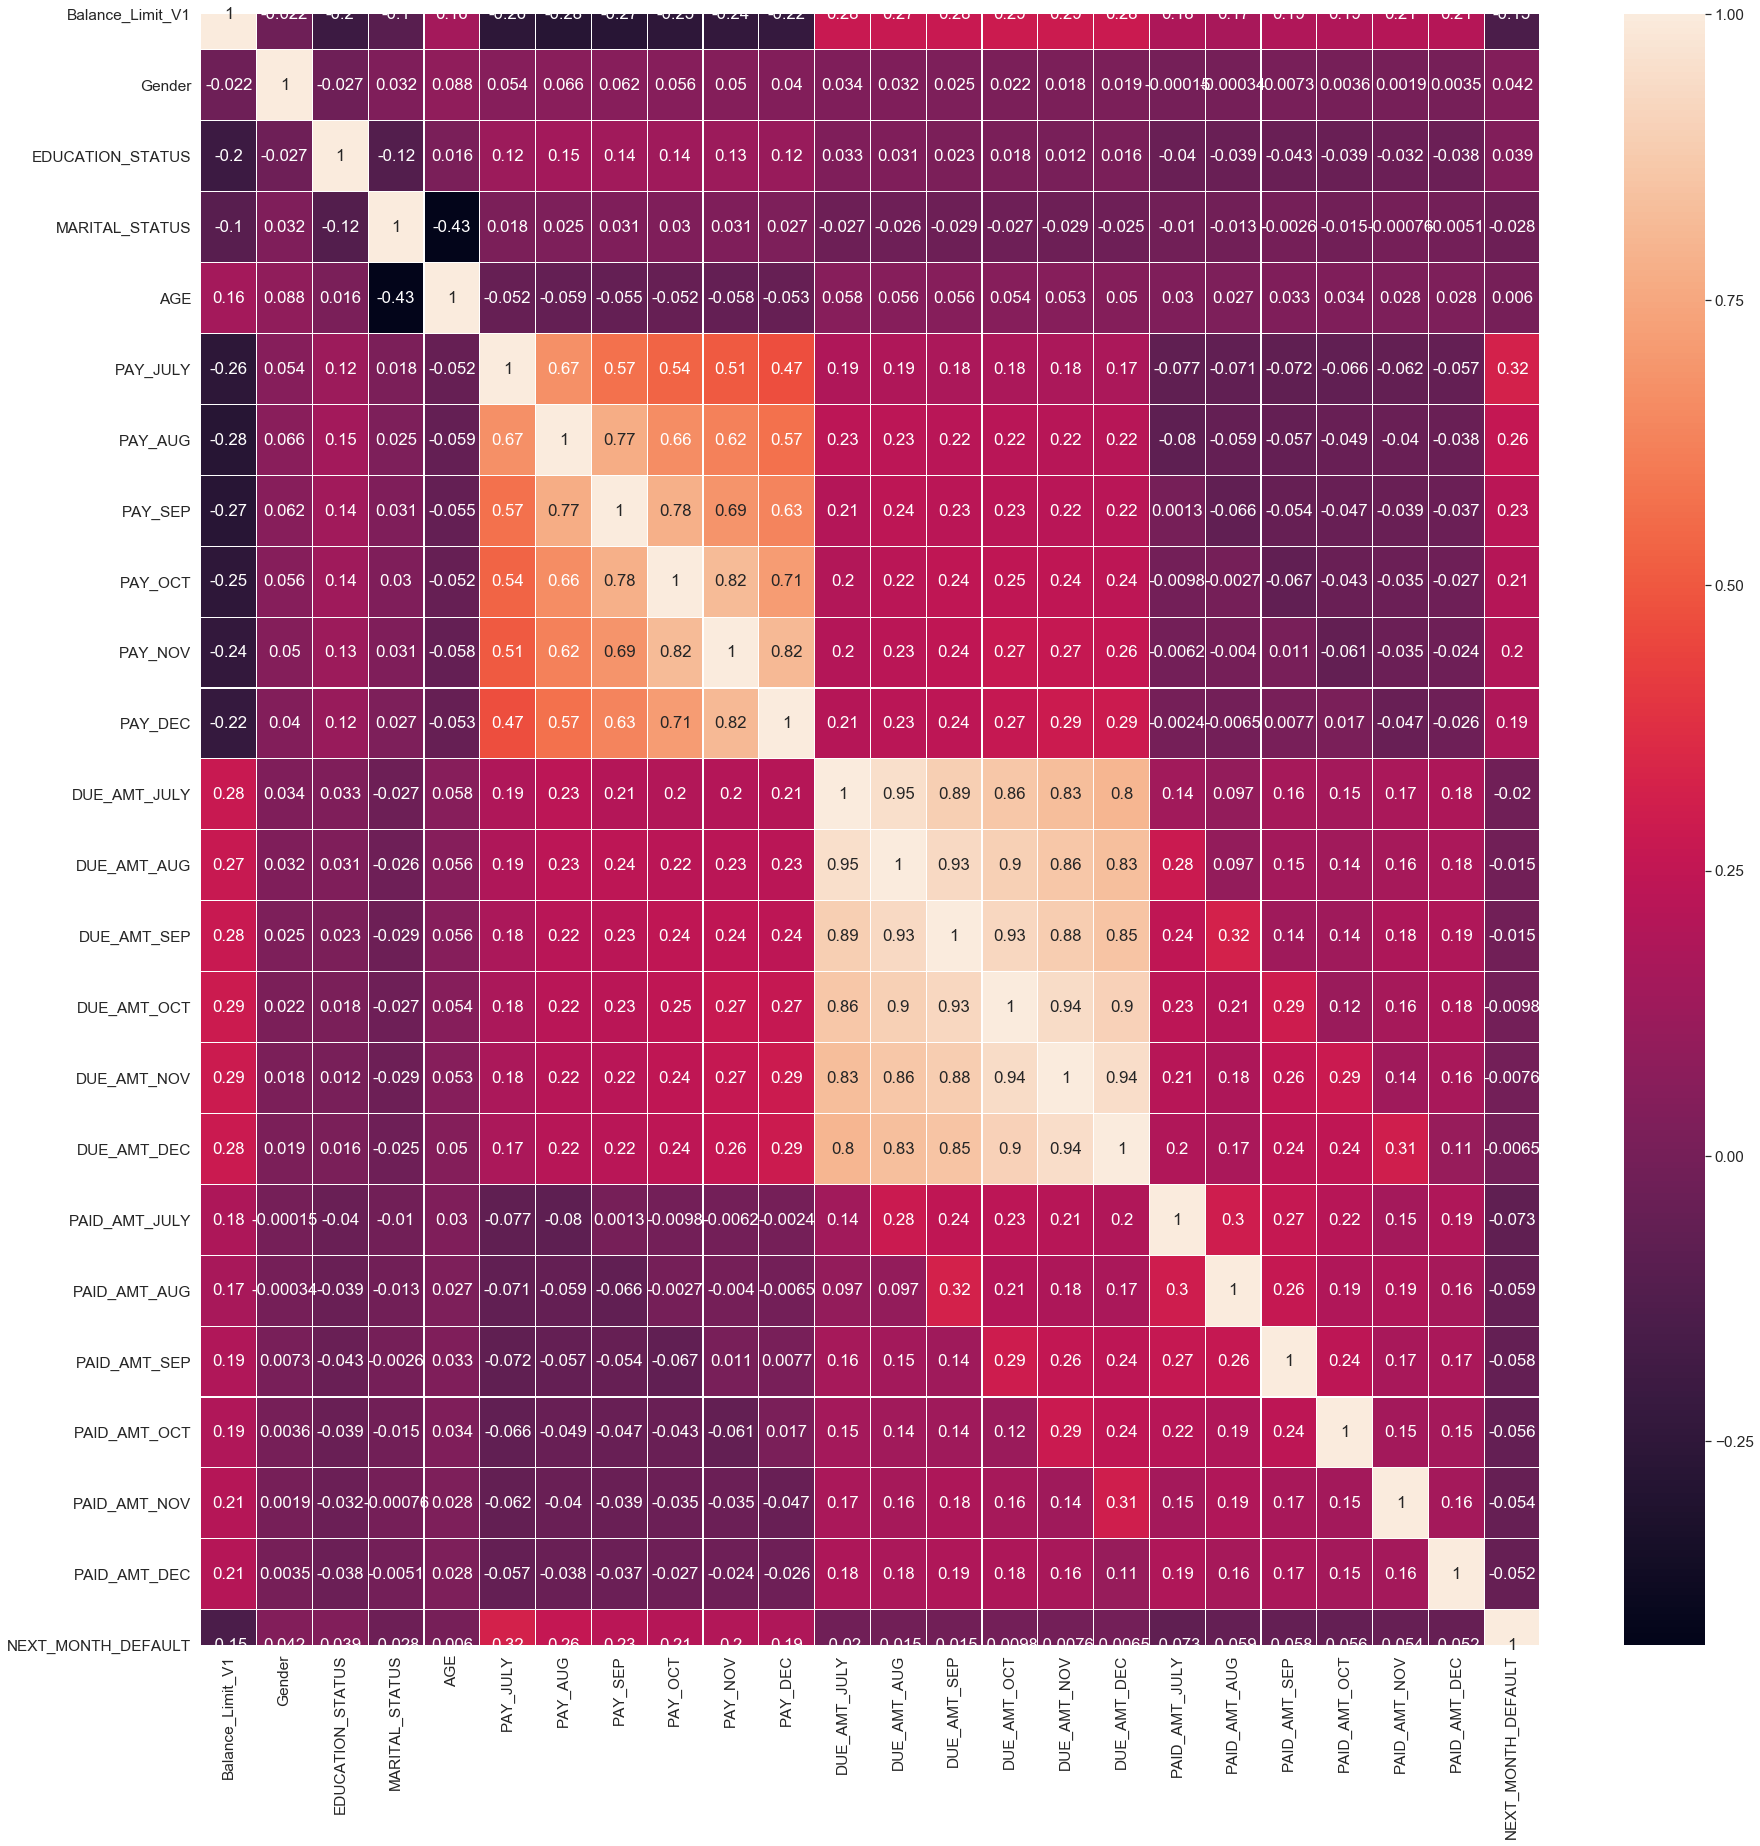

['PAY_OCT', 'DUE_AMT_SEP', 'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'DUE_AMT_JULY']


In [6]:
corr_heatmap(training_data)
print(find_correlation(training_data))

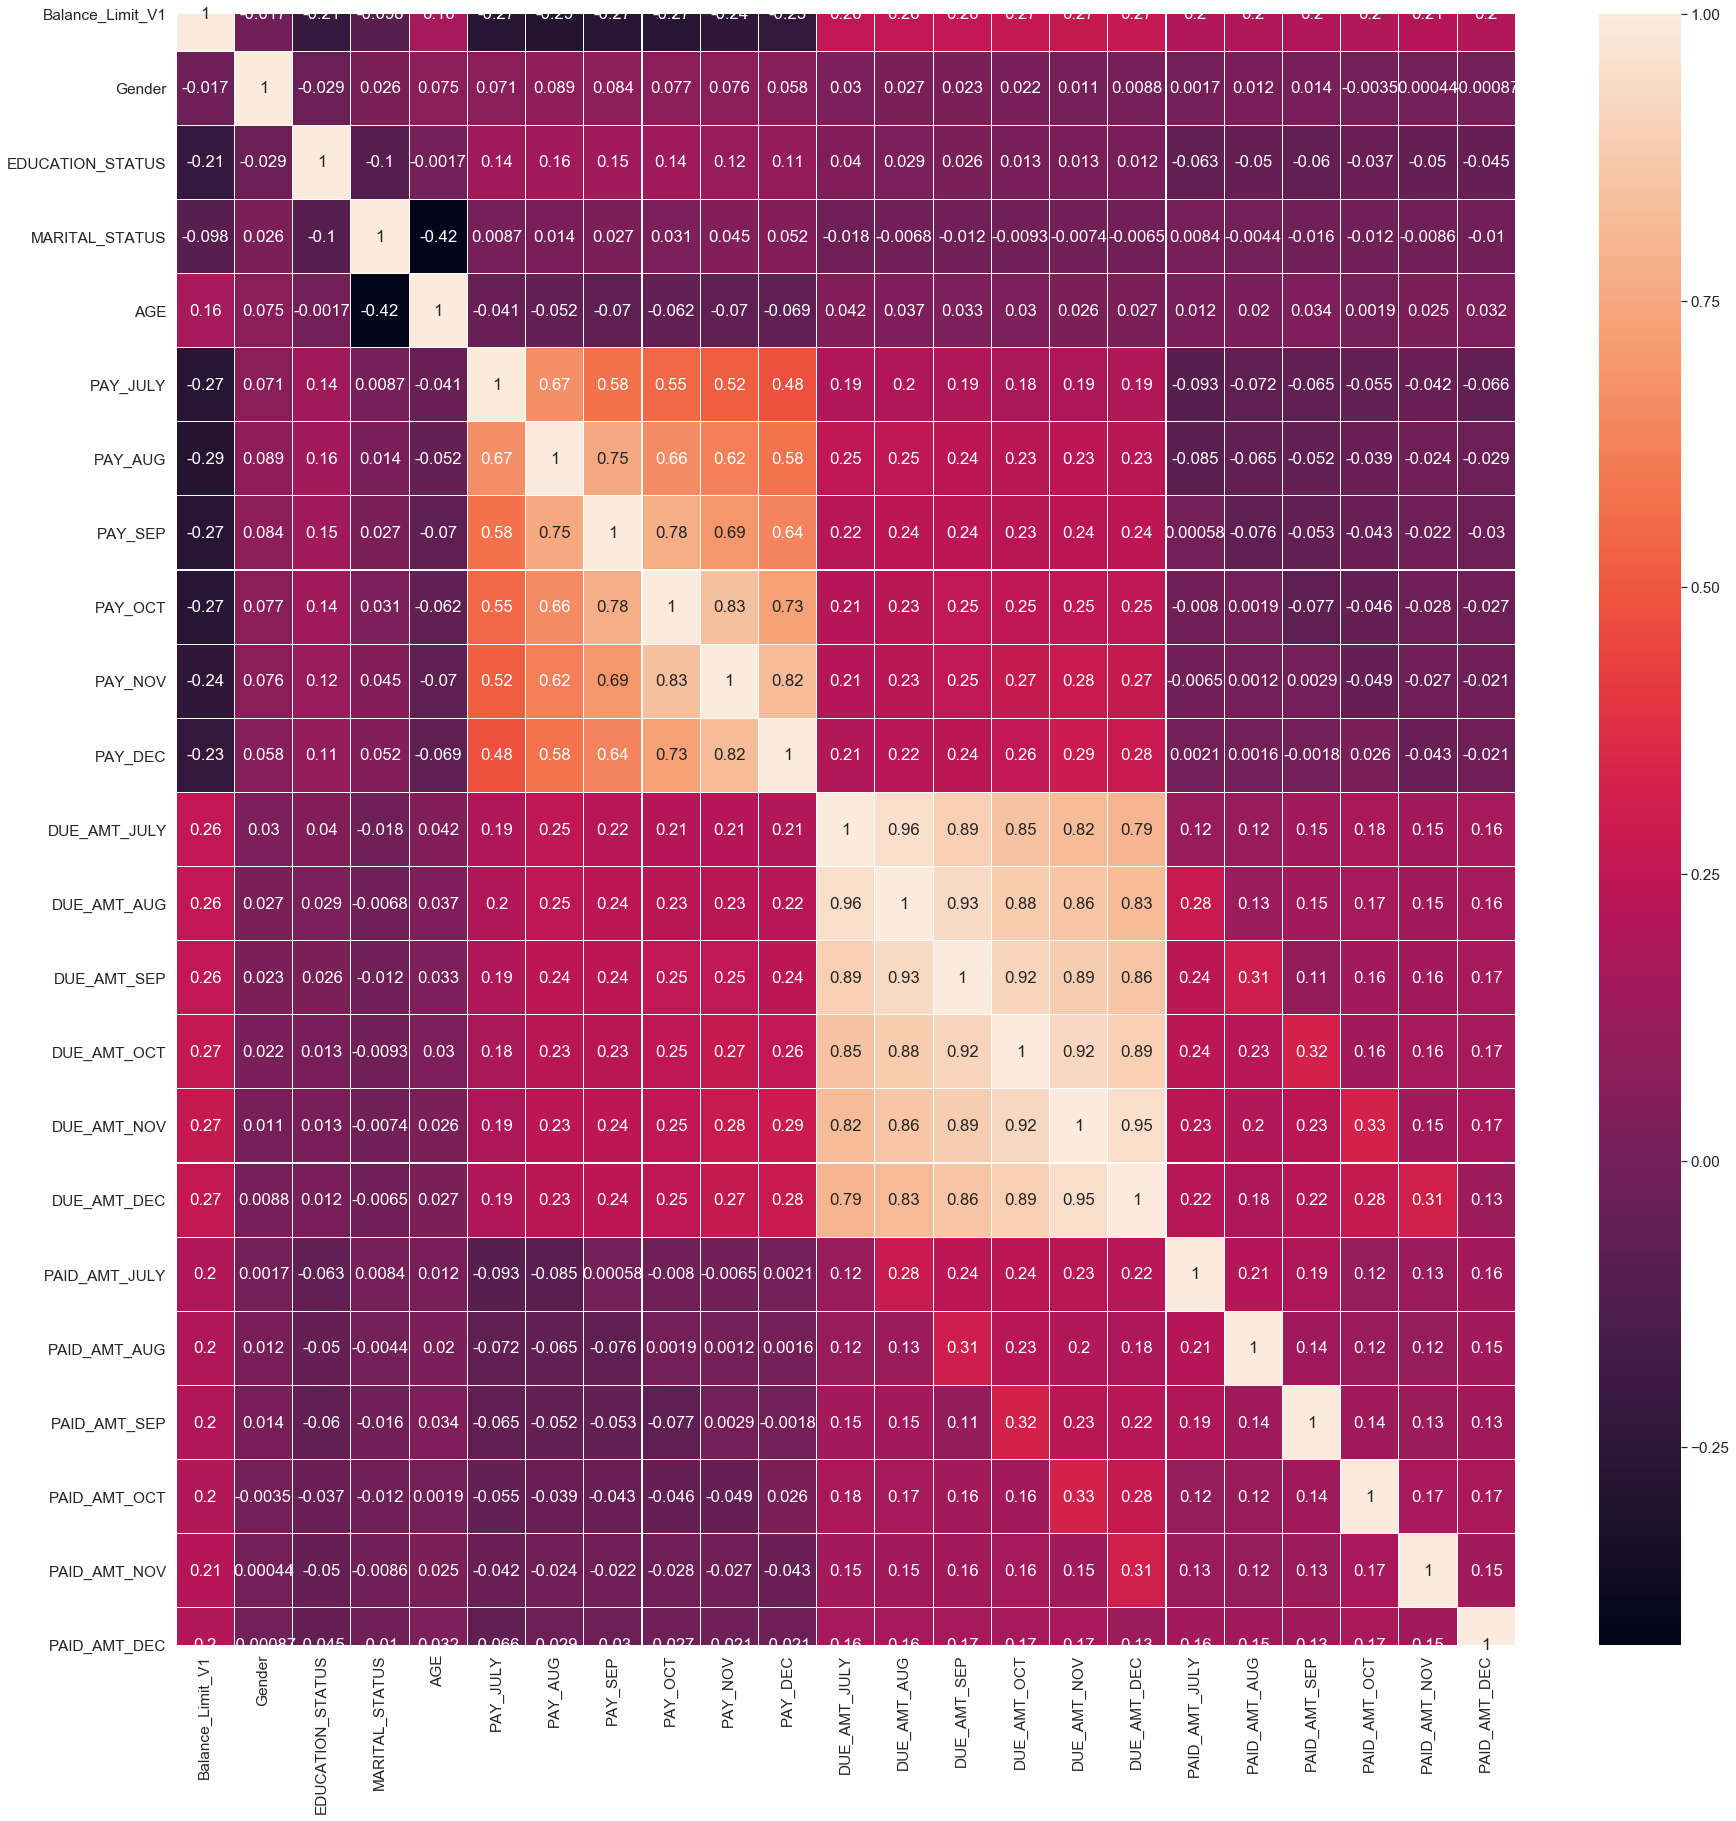

['PAY_OCT', 'DUE_AMT_SEP', 'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_JULY']


In [7]:
corr_heatmap(test_data)
print(find_correlation(test_data))

In [8]:
columns = training_data.columns

In [9]:
columns

Index(['Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS',
       'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV',
       'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
       'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG',
       'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC',
       'NEXT_MONTH_DEFAULT'],
      dtype='object')

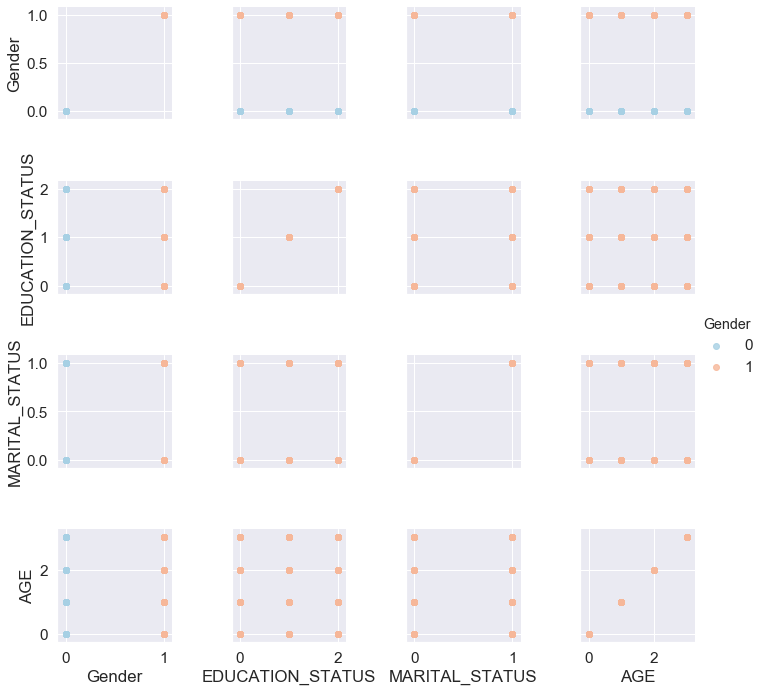

In [10]:
g = sns.PairGrid(training_data, vars=['Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS',
       'AGE'],hue='Gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

None of the life factors ('Gender', 'Age', 'Marriage_status', 'Education_status') are correlated.

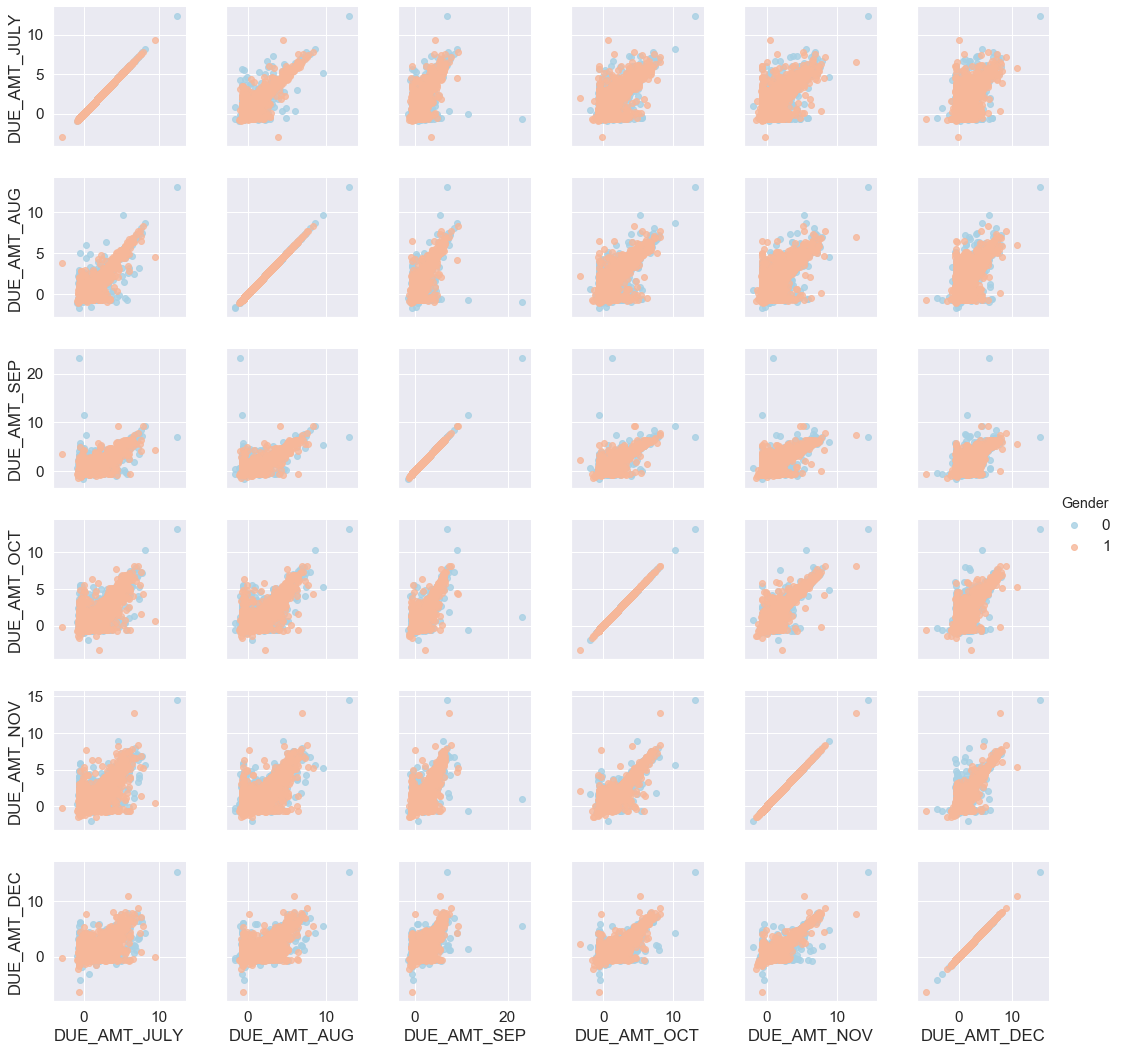

In [11]:
g = sns.PairGrid(training_data, vars=[ 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
       'DUE_AMT_NOV', 'DUE_AMT_DEC'],hue='Gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

As you can see most of the due amounts are highly correlated. Unlike other due amounts Due amount of December shows a signifcant importance in Gender factor. Let check the distribution using the Violin plot

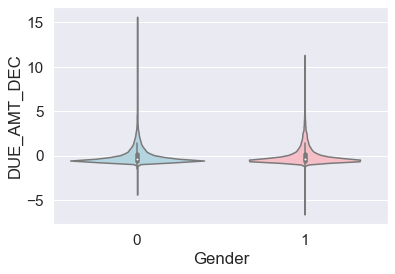

In [12]:
sns.violinplot("Gender", "DUE_AMT_DEC", data=training_data,
               palette=["lightblue", "lightpink"]);

By looking at the Violin plot it is clear that men tend to have 0 dues more when compared to women

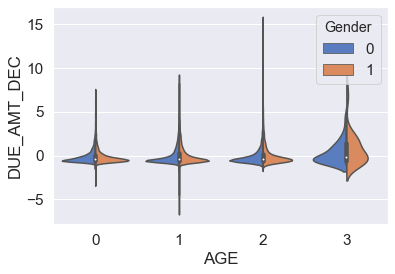

In [13]:
with sns.axes_style(style=None):
    sns.violinplot("AGE", "DUE_AMT_DEC", hue="Gender", data=training_data,
                   split=True,
                   palette="muted");

Men above 65 years old tends to have more O dues than women over 65 years. But overall Womens tends to have more debts in December (Overall area is larger) and over 65 year old women tends to have more debts that other women.
In this perspective it is intelligent to keep an eye on Older Women than other because they tend to default next months payments.

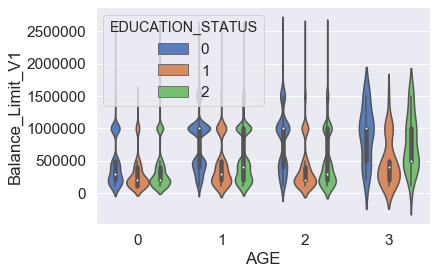

In [14]:
with sns.axes_style(style=None):
    sns.violinplot("AGE", 'Balance_Limit_V1', hue="EDUCATION_STATUS", data=training_data,
                   split=False,
                   palette="muted");

It with the increase in age the balance limit is increasing linearly. As I mentioned above older people tends to have higher due amounts. So having a larger balance limit will increase the tendancy to default much more for older people with this new information.

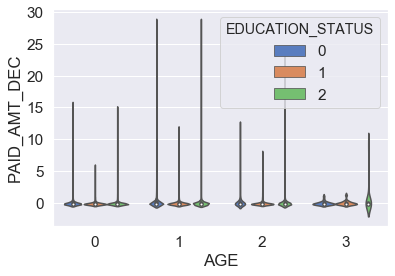

In [15]:
with sns.axes_style(style=None):
    sns.violinplot("AGE", "PAID_AMT_DEC", hue="EDUCATION_STATUS", data=training_data,
                   split=False,
                   palette="muted");

When comparing the different educational status of different ages . People with Graduate or High school education pay amounts on December are similar. But that not true with people with other educational backgrounds.

Lets check it with the gender change

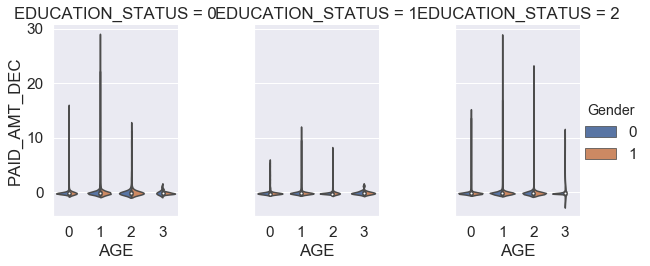

In [16]:
g = sns.catplot(x="AGE", y="PAID_AMT_DEC",

                hue="Gender", col="EDUCATION_STATUS",

                data=training_data, kind="violin", split=True,

                height=4, aspect=.7);

Now it is clear by looking at the 3rd graph women with over 65 years tends not to pay. And people with graduate education tends to pay despite of their age.

## Conclusion

In conclusion, the Age and Education Status plays a huge role in predicting whether the client will default or not in the next month. Furthur more, due amounts have a higher correlation except in month december. So, huge concern should go to the values in Decembers due amounts. So, it is better to take a sum of the due amounts as another feature, so we can remove the other due amounts . there is a very less correlation in paid amounts of each moonths, so there is no need fiddle with them.